In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/MyDrive/INF-354")
import pandas as pd
import numpy as np
datos = pd.read_csv("vinosDataset.csv")
print(datos)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

**a)** Con Python sin uso de librerías, calcule del ultimo cuartil, percentil 80 por columna; explique qué significa en cada caso.

In [6]:
import csv

# Función para calcular el último cuartil y el percentil 80 de una lista de datos
def calcular_estadisticas(datos):
    # Ordenar los datos
    datos_ordenados = sorted(datos)

    # Calcular el último cuartil (Q3)
    ultimo_cuartil = datos_ordenados[int(len(datos_ordenados) * 0.75)]

    # Calcular el percentil 80
    percentil_80 = datos_ordenados[int(len(datos_ordenados) * 0.8)]

    return ultimo_cuartil, percentil_80

# Leer el archivo CSV
with open('vinosDataset.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)

    # Obtener los nombres de las columnas
    columnas = reader.fieldnames

    # Inicializar un diccionario para almacenar los datos de las columnas numéricas
    datos_columnas = {col: [] for col in columnas}  # Limitamos hasta la columna 13

    # Leer los datos del archivo CSV y almacenarlos en el diccionario
    for fila in reader:
        for col in columnas:  # Limitamos hasta la columna 13
            valor = fila[col]
            if valor.isdigit():  # Verificar si el valor es un número
                datos_columnas[col].append(int(valor))
            else:
                datos_columnas[col].append(valor)  # Si no es un número, mantener el valor como está

    # Calcular el último cuartil y el percentil 80 para cada columna numérica
    for col in columnas:  # Limitamos hasta la columna 13
        ultimo_cuartil, percentil_80 = calcular_estadisticas(datos_columnas[col])
        print(f"Columna {col}: Último cuartil={ultimo_cuartil}, Percentil 80={percentil_80}")



Columna fixed acidity: Último cuartil=8.2, Percentil 80=8.5
Columna volatile acidity: Último cuartil=0.64, Percentil 80=0.66
Columna citric acid: Último cuartil=0.42, Percentil 80=0.46
Columna residual sugar: Último cuartil=2.6, Percentil 80=2.7
Columna chlorides: Último cuartil=0.09, Percentil 80=0.094
Columna free sulfur dioxide: Último cuartil=5.0, Percentil 80=6.0
Columna total sulfur dioxide: Último cuartil=54.0, Percentil 80=60.0
Columna density: Último cuartil=0.99784, Percentil 80=0.99818
Columna pH: Último cuartil=3.4, Percentil 80=3.43
Columna sulphates: Último cuartil=0.73, Percentil 80=0.76
Columna alcohol: Último cuartil=9.4, Percentil 80=9.5
Columna quality: Último cuartil=6, Percentil 80=6


**b)**Realice lo mismo del inciso (a) con el uso de numpy y pandas

In [7]:
import pandas as pd
import numpy as np

# Leer el archivo CSV
datos = pd.read_csv('vinosDataset.csv')


columnas_numericas = datos.iloc[:]

# Calcular el último cuartil y el percentil 80 para cada columna numérica
ultimo_cuartil = columnas_numericas.quantile(0.75)
percentil_80 = columnas_numericas.quantile(0.8)

# Mostrar los resultados
print("Último Cuartil:")
print(ultimo_cuartil)
print("\nPercentil 80:")
print(percentil_80)


Último Cuartil:
fixed acidity            9.200000
volatile acidity         0.640000
citric acid              0.420000
residual sugar           2.600000
chlorides                0.090000
free sulfur dioxide     21.000000
total sulfur dioxide    62.000000
density                  0.997835
pH                       3.400000
sulphates                0.730000
alcohol                 11.100000
quality                  6.000000
Name: 0.75, dtype: float64

Percentil 80:
fixed acidity            9.700000
volatile acidity         0.660000
citric acid              0.460000
residual sugar           2.700000
chlorides                0.094000
free sulfur dioxide     24.000000
total sulfur dioxide    69.000000
density                  0.998174
pH                       3.424000
sulphates                0.760000
alcohol                 11.300000
quality                  6.000000
Name: 0.8, dtype: float64


**c)** Obtenga la media, mediana, moda y geométrica; explique la diferencia de los resultados y cuál de ellas se puede utilizar en un artículo científico.

In [8]:
import pandas as pd
import numpy as np

# Leer el archivo CSV
datos = pd.read_csv('vinosDataset.csv')

# Seleccionar solo las columnas numéricas hasta la columna 13
columnas_numericas = datos.iloc[:]

# Calcular la media, mediana, moda y media geométrica para cada columna numérica
media = columnas_numericas.mean()
mediana = columnas_numericas.median()
moda = columnas_numericas.mode().iloc[0]  # Puede haber múltiples modas, tomamos la primera
media_geometrica = np.exp(np.log(columnas_numericas).mean())

# Mostrar los resultados
print("Media:")
print(media)
print("\nMediana:")
print(mediana)
print("\nModa:")
print(moda)
print("\nMedia Geométrica:")
print(media_geometrica)


Media:
fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

Mediana:
fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.07900
free sulfur dioxide     14.00000
total sulfur dioxide    38.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
quality                  6.00000
dtype: float64

Moda:
fixed acidity            7.2000
volatile acidity         0.6000
citric acid              0.0000
residual sugar           2.0000
chlorides     

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


  **d)** Grafique los datos y explique su comportamiento (PYTHON)

**Media:** Representa el valor promedio de un conjunto de datos. Se utiliza comúnmente cuando los datos tienen una distribución normal y no están sesgados.

**Mediana:** Es el valor central de un conjunto de datos ordenados. Es menos sensible a los valores atípicos que la media y puede ser más representativa en datos sesgados o con distribuciones no normales.

**Moda:** Es el valor que aparece con mayor frecuencia en un conjunto de datos. Es útil para datos categóricos y discretos, aunque también puede usarse con datos continuos. Puede ser especialmente relevante para identificar comportamientos predominantes o patrones en los datos.

**Media Geométrica: **Es útil cuando se trabaja con datos positivos o cuando se quiere calcular un promedio ponderado que tenga en cuenta la magnitud relativa de los valores. Es especialmente adecuada cuando los datos se distribuyen de manera exponencial o geométrica.

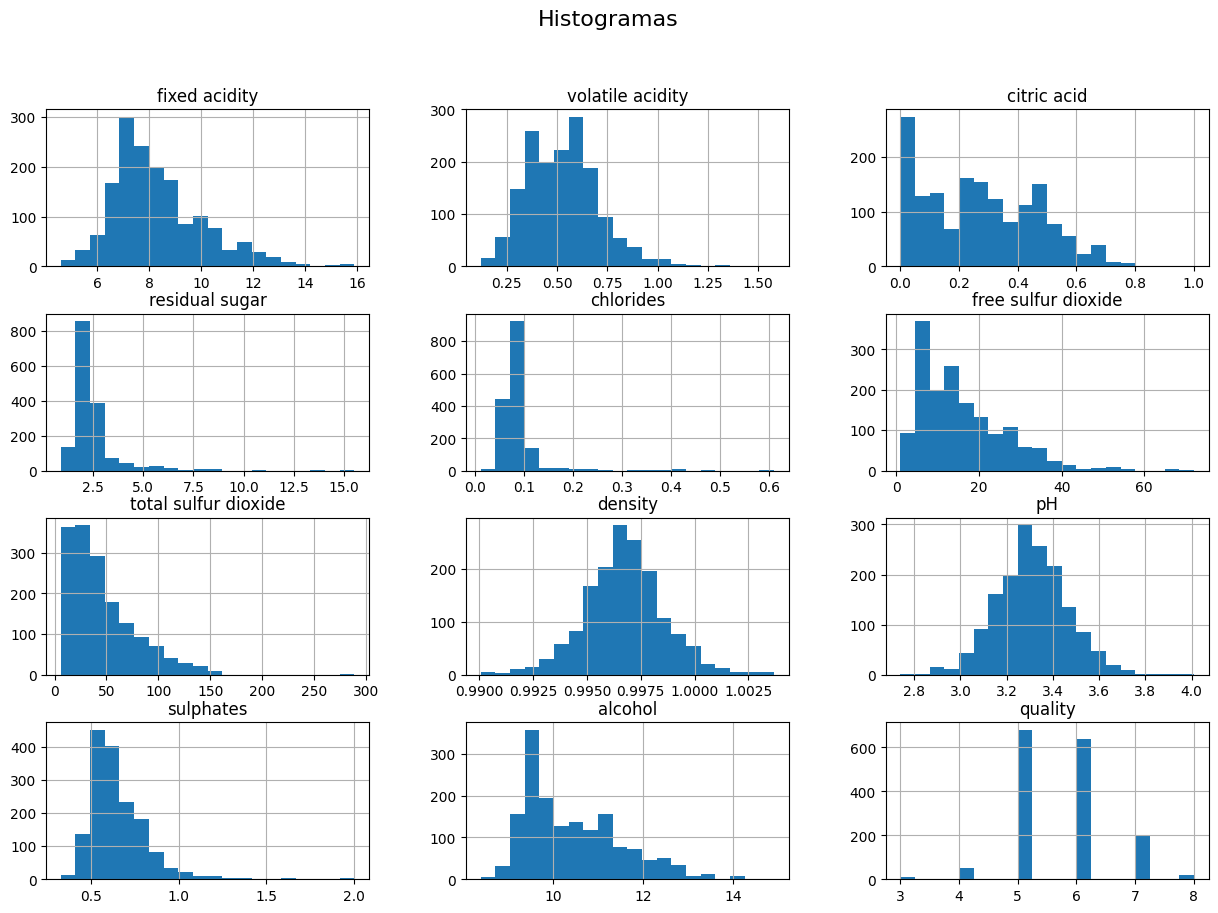

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

datos = pd.read_csv('vinosDataset.csv')

# Seleccionar solo las columnas
columnas_numericas = datos.iloc[:]

# Graficar los datos
columnas_numericas.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogramas', fontsize=16)
plt.show()
